In [61]:
import networkx as nx
import random
import csv
import matplotlib.pyplot as plt

def rand():
    return(random.random())

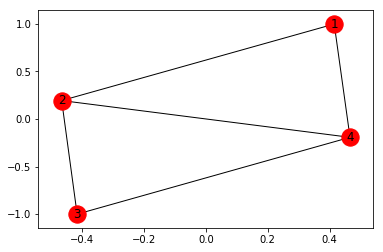

In [35]:
G = nx.Graph()
G.add_edge(1,2)
G.add_edge(2,3)
G.add_edge(3,4)
G.add_edge(4,1)
G.add_edge(4,2)
nx.draw_networkx(G)

In [ ]:
x = [1,0,0,0] # vector of infected nodes, x_0
 

Propagation Formula:
$$ x_{i,j} = \theta (x_{i,t-1} \sum_{j}a_{i,j}x_{i,t-1} )$$
where
$\theta = 0 $ if $ \gt 0, 1 $ if $ \leq 0 $

In [50]:
def infect(G,o,T,dur):
    import networkx as nx 
    import random as rn
    beeninfected ={}
    timeInfected ={}
    for i in G.nodes():
        beeninfected[i]=False
        timeInfected[i]=0
    beeninfected[o]=True
    A=[o]
    Rtime={}
    Reff={}
    EI={}
    S={}
    R={}
    I={}
    time=0
    EI[time]=1
    R[time]=0
    S[time]=G.order()-1
    I[time]=1
    while len(A)>0:
        newA=[]
        time +=1
        EI[time]=EI[time -1]
        S[time]=S[time -1] 
        R[time]=R[time -1] 
        for i in A: 
            timeInfected[i]=timeInfected[i]+1
            if timeInfected[i]==dur: 
                R[time]=R[time]+1
            elif timeInfected[i]<dur: 
                newA.append(i) 
                I[time]=I.get(time ,0)+1
                for j in G.neighbors(i):
                    if beeninfected[j]==False:
                        if rn.random()<=T:
                            Reff[i]=Reff.get(i,0.)+1 
                            beeninfected[j]=True 
                            timeInfected[j]=0 
                            EI[time]=EI[time]+1 
                            S[time]=S[time]-1 
                            I[time]=I[time]+1 
                            newA.append(j)
        RtimeStep=float(len(newA)-len(A))/len(A)
        Rtime[time]=RtimeStep
        A=newA
    Reffavg=0
    for i in Reff.keys():
        Reffavg=Reffavg+Reff[i]
    if len(Reff)==0:
        Reffavg=0
    else:
        Reffavg=Reffavg/len(Reff)
    OutDic ={}
    OutDic['I']=I 
    OutDic['EI']=EI 
    OutDic['S']=S 
    OutDic['R']=R 
    OutDic['Rtime']=Rtime 
    OutDic['Reffavg']=Reffavg 
    OutDic['time']=time 
    return(OutDic)

o = 1
T = 1
dur = 21

epidemic = infect(G,o,T,dur)

In [51]:
for k,v in epidemic.items():
    print(k,v)

I {0: 1, 1: 3, 2: 4, 3: 4, 4: 4, 5: 4, 6: 4, 7: 4, 8: 4, 9: 4, 10: 4, 11: 4, 12: 4, 13: 4, 14: 4, 15: 4, 16: 4, 17: 4, 18: 4, 19: 4, 20: 4, 21: 3, 22: 1}
EI {0: 1, 1: 3, 2: 4, 3: 4, 4: 4, 5: 4, 6: 4, 7: 4, 8: 4, 9: 4, 10: 4, 11: 4, 12: 4, 13: 4, 14: 4, 15: 4, 16: 4, 17: 4, 18: 4, 19: 4, 20: 4, 21: 4, 22: 4, 23: 4}
S {0: 3, 1: 1, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0, 10: 0, 11: 0, 12: 0, 13: 0, 14: 0, 15: 0, 16: 0, 17: 0, 18: 0, 19: 0, 20: 0, 21: 0, 22: 0, 23: 0}
R {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0, 10: 0, 11: 0, 12: 0, 13: 0, 14: 0, 15: 0, 16: 0, 17: 0, 18: 0, 19: 0, 20: 0, 21: 1, 22: 3, 23: 4}
Rtime {1: 2.0, 2: 0.3333333333333333, 3: 0.0, 4: 0.0, 5: 0.0, 6: 0.0, 7: 0.0, 8: 0.0, 9: 0.0, 10: 0.0, 11: 0.0, 12: 0.0, 13: 0.0, 14: 0.0, 15: 0.0, 16: 0.0, 17: 0.0, 18: 0.0, 19: 0.0, 20: 0.0, 21: -0.25, 22: -0.6666666666666666, 23: -1.0}
Reffavg 1.5
time 23


model duration is the longest shortest path + duration when tau is 1 in a network that is not disconnected

In [54]:
def graph_from_data(data_file,skip_row):
    data = []
    G = nx.Graph()
    with open(data_file, newline='\n') as csvfile:
        reader = csv.reader(csvfile, delimiter='\t')
        for row in reader:
             data.append(row)
    for itera in range(skip_row,len(data)):
        i = int(data[itera][0])
        j = int(data[itera][1])
        G.add_edge(i,j)
    return(G)

C = graph_from_data('ca-CondMat-noself.txt',4)

In [59]:
o = list(C.nodes())[0]
T = .05
dur = 21

epidemic = infect(C,o,T,dur)

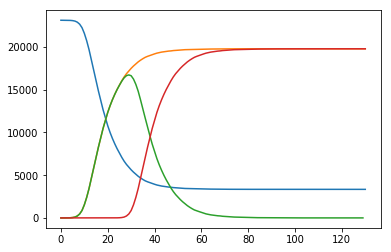

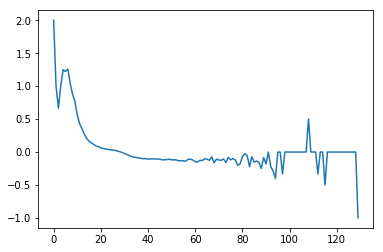

In [68]:
plt.plot(epidemic['S'].values())
plt.plot(epidemic['EI'].values())
plt.plot(epidemic['I'].values())
plt.plot(epidemic['R'].values())
plt.show()
plt.plot(epidemic['Rtime'].values())